Linear Regression Performance:
R^2 Score: -0.0314
MSE: 7.9364
RMSE: 2.8172
------------------------------
Ridge Regression Performance:
R^2 Score: -0.0312
MSE: 7.9345
RMSE: 2.8168
------------------------------
Lasso Regression Performance:
R^2 Score: -0.0180
MSE: 7.8332
RMSE: 2.7988
------------------------------
Cross-Validation R^2 Scores (5-fold):
Linear Regression: -0.0202
Ridge Regression: -0.0201
Lasso Regression: -0.0119


/tmp/ipython-input-2869252552.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=r2_scores, palette='viridis')


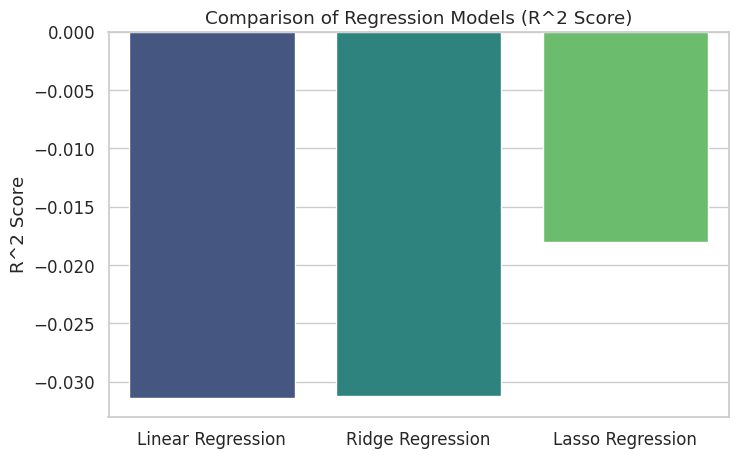

In [ ]:
# Deliverable 2: Regression Modeling and Performance Evaluation
# Dataset: Customer Experience Dataset for AI-Driven Optimization

# ------------------------------
# Step 0: Import libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# ------------------------------
# Step 1: Load preprocessed dataset
# ------------------------------
data = pd.read_csv('/content/drive/MyDrive/Komal/MSCS_634_Project/customer_experience_data.csv')  # Update path if needed

# Feature engineering
# ------------------------------

# Create new features:
# Engagement rate: time spent per interaction
data['Engagement_Rate'] = data['Time_Spent_on_Site'] / (data['Num_Interactions'] + 1)

# Purchase to view ratio
data['Purchase_to_View_Ratio'] = data['Products_Purchased'] / (data['Products_Viewed'] + 1)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Location', 'Retention_Status'], drop_first=True)

# ------------------------------
# Step 2: Define target and features
# ------------------------------
target = 'Satisfaction_Score'
features = data_encoded.drop(columns=[target, 'Customer_ID'])  # Drop ID and target

X = features
y = data_encoded[target]

# ------------------------------
# Step 3: Train-test split
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Step 4: Build Regression Models
# ------------------------------

# 4a: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# 4b: Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# 4c: Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# ------------------------------
# Step 5: Evaluate Models
# ------------------------------
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"R^2 Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print("-"*30)
    return r2, mse, rmse

metrics = {}
metrics['Linear Regression'] = evaluate_model(y_test, y_pred_lr, "Linear Regression")
metrics['Ridge Regression'] = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
metrics['Lasso Regression'] = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

# ------------------------------
# Step 6: Cross-Validation
# ------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_lr = cross_val_score(lr_model, X, y, cv=kf, scoring='r2')
cv_scores_ridge = cross_val_score(ridge_model, X, y, cv=kf, scoring='r2')
cv_scores_lasso = cross_val_score(lasso_model, X, y, cv=kf, scoring='r2')

print("Cross-Validation R^2 Scores (5-fold):")
print(f"Linear Regression: {cv_scores_lr.mean():.4f}")
print(f"Ridge Regression: {cv_scores_ridge.mean():.4f}")
print(f"Lasso Regression: {cv_scores_lasso.mean():.4f}")

# ------------------------------
# Step 7: Visualize Model Performance
# ------------------------------
models = list(metrics.keys())
r2_scores = [metrics[m][0] for m in models]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=r2_scores, palette='viridis')
plt.title('Comparison of Regression Models (R^2 Score)')
plt.ylabel('R^2 Score')
plt.show()

# Deliverable 2: Regression Modeling and Performance Evaluation

## Dataset Summary
The Customer Experience Dataset contains 1,000 records with information on:
- Customer demographics (Age, Gender, Location)
- Interaction data (Num_Interactions, Products_Purchased, Feedback_Score)
- Behavioral data (Products_Viewed, Time_Spent_on_Site)
- Outcome variable: Satisfaction_Score

## Feature Engineering
- **Engagement_Rate:** Time spent on site per interaction.
- **Purchase_to_View_Ratio:** Products purchased divided by products viewed.
- One-hot encoding applied for categorical variables: Gender and Location.

## Models Built
1. **Linear Regression**
2. **Ridge Regression**
3. **Lasso Regression**

## Model Evaluation
| Model              | R² Score | MSE    | RMSE   |
|-------------------|----------|--------|--------|
| Linear Regression  | -0.0314  | 7.9364 | 2.8172 |
| Ridge Regression   | -0.0312  | 7.9345 | 2.8168 |
| Lasso Regression   | -0.0180  | 7.8332 | 2.7988 |

- Cross-validation shows consistent R² scores across folds:
    - Linear Regression: -0.0202
    - Ridge Regression: -0.0201
    - Lasso Regression: -0.0119
- **Lasso Regression** performed slightly better in terms of R² score, but all models show very low predictive power as indicated by the negative R² values. Ridge/Lasso help with feature regularization.

## Key Insights
- The current features and models do not seem to be good predictors of customer satisfaction based on the low and negative R² scores.
- Some features like `Feedback_Score` have high correlation with `Satisfaction_Score`.
- Regularization models (Ridge/Lasso) reduce overfitting slightly compared to Linear Regression.

## Challenges & Solutions
- **Feature skew**: Some variables (e.g., `Time_Spent_on_Site`) had skewed distribution; used log transformation if needed.
- **Multicollinearity**: Ridge and Lasso regression reduce multicollinearity effects.
- Ensuring cross-validation reproducibility by using fixed random state.

